# Part 1 - Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam

### Importing the dataset

In [2]:
dataset = pd.read_excel('RPDataset4.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Explosive type                   1540 non-null   object 
 1   Explosive mass                   1540 non-null   float64
 2   Perpendicular standoff distance  1540 non-null   float64
 3   Incident angle                   1540 non-null   int64  
 4   Peak reflected pressure          1540 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 60.3+ KB


In [3]:
# convert categorical variable into dummy variables
dataset = pd.get_dummies(dataset, columns=['Explosive type'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Explosive mass                   1540 non-null   float64
 1   Perpendicular standoff distance  1540 non-null   float64
 2   Incident angle                   1540 non-null   int64  
 3   Peak reflected pressure          1540 non-null   float64
 4   Explosive type_Composition B     1540 non-null   uint8  
 5   Explosive type_TNT               1540 non-null   uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 51.3 KB


In [4]:
y = dataset[('Peak reflected pressure')]
X = dataset.drop('Peak reflected pressure', axis=1)
print(X.shape, y.shape)

(1540, 5) (1540,)


In [5]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 71)

In [7]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 71)

### Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:3] = sc.fit_transform(X_train[:, 0:3])
print (X_train)

In [ ]:
X_test[:,0:3] = sc.transform(X_test[:, 0:3])
print (X_test)

In [ ]:
X_val[:,0:3] = sc.transform(X_val[:, 0:3])
print (X_val)

# Part 2 - Building the ANN

### Initializing the ANN

In [8]:
# Set seed for NumPy
np.random.seed(54)

# Set seed for TensorFlow
tf.random.set_seed(54)

ann = Sequential()

### Adding the input layer and the first hidden layer

In [9]:
ann.add(Dense(units=210,
              input_shape=(X_train.shape[1],),
              activation='relu'))
#ann.add(Dropout(0.1))

### Adding the second hidden layer

In [10]:
ann.add(Dense(units=210,
              activation='relu'))
#ann.add(Dropout(0.1))'))
#ann.add(Dropout(0.1))

### Adding the output layer

In [11]:
ann.add(Dense(units=1,
              activation='linear'))

### what model looks like

In [12]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 210)               1260      
                                                                 
 dense_1 (Dense)             (None, 210)               44310     
                                                                 
 dense_2 (Dense)             (None, 1)                 211       
                                                                 
Total params: 45781 (178.83 KB)
Trainable params: 45781 (178.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Part 3 - Training the ANN

### Compiling the ANN

In [13]:
opt = Nadam(learning_rate=0.01)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

### early stopping callback

In [14]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_mae',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)
#checkpoint_filepath = 'checkpoints'
#checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, 
#                    monitor="val_mae", mode="min", 
#                    save_best_only=True, verbose=1)

### Training the ANN model on the Training set

In [15]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs=500,
                    callbacks=[es],
                    batch_size=50,
                    verbose=1)
#ann.load_weights(checkpoint_filepath)

Epoch 1/500
22/22 [==============================] - 2s 16ms/step - loss: 532112.5000 - mae: 403.6746 - val_loss: 401880.3438 - val_mae: 413.7960
Epoch 2/500
22/22 [==============================] - 0s 5ms/step - loss: 279782.4375 - mae: 321.5096 - val_loss: 227138.2188 - val_mae: 280.7438
Epoch 3/500
22/22 [==============================] - 0s 5ms/step - loss: 163379.6875 - mae: 212.7866 - val_loss: 156162.6719 - val_mae: 220.1444
Epoch 4/500
22/22 [==============================] - 0s 5ms/step - loss: 122837.4531 - mae: 175.1145 - val_loss: 104319.9766 - val_mae: 160.3050
Epoch 5/500
22/22 [==============================] - 0s 5ms/step - loss: 88335.5703 - mae: 142.8471 - val_loss: 71212.1875 - val_mae: 140.2255
Epoch 6/500
22/22 [==============================] - 0s 5ms/step - loss: 62054.8242 - mae: 121.4866 - val_loss: 59475.4922 - val_mae: 121.7633
Epoch 7/500
22/22 [==============================] - 0s 5ms/step - loss: 49482.5117 - mae: 107.8198 - val_loss: 44994.1445 - val_mae:

### Analyse learn history

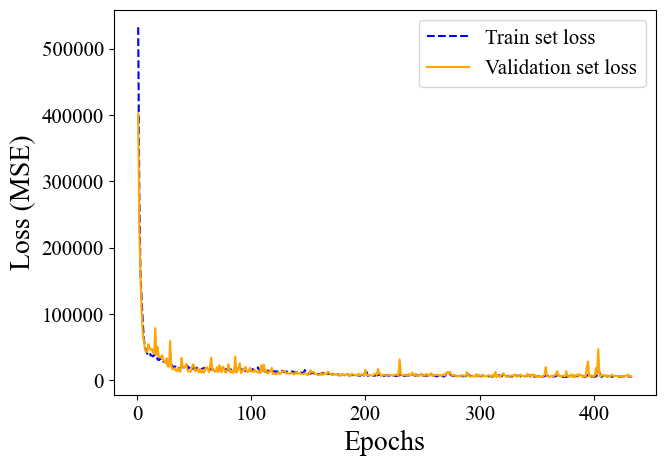

In [16]:
# let's see the training and validation accuracy by epoch
plt.figure(figsize=(7,5))

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss', linestyle='--')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs', fontsize = 20)
plt.ylabel('Loss (MSE)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='upper right',fontsize = 15)
plt.show()

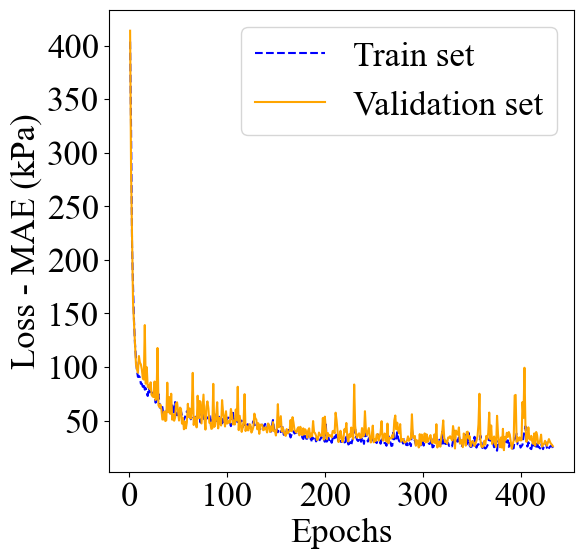

In [37]:
# let's see the training and validation accuracy by epoch
plt.figure(figsize=(6,6))

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set', linestyle='--')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs', fontsize = 25)
plt.ylabel('Loss - MAE (kPa)', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(loc='upper right',fontsize = 25)
plt.savefig('MAE.png', dpi = 600, bbox_inches = 'tight')
plt.show()

In [32]:
# Convert arrays to DataFrames
df1 = pd.DataFrame(epochs)
df2 = pd.DataFrame(loss_values)
df3 = pd.DataFrame(val_loss_values)
df4 = pd.DataFrame(loss_values1)
df5 = pd.DataFrame(val_loss_values1)

# Concatenate DataFrames along the vertical axis
mse_df = pd.concat([df1, df2, df3], axis=1)
mae_df = pd.concat([df1, df4, df5], axis=1)

# Add labels to the DataFrame
mse_df.columns = ['Epochs', 'Train loss', 'Val loss']
mae_df.columns = ['Epochs', 'Train loss', 'Val loss']

# Save concatenated DataFrame to Excel file
mse_df.to_excel("MSE.xlsx", index=False)
mae_df.to_excel("MAE.xlsx", index=False)

In [ ]:
print (epochs)

# Part 4 - Make predictions

8/8 [==============================] - 0s 2ms/step


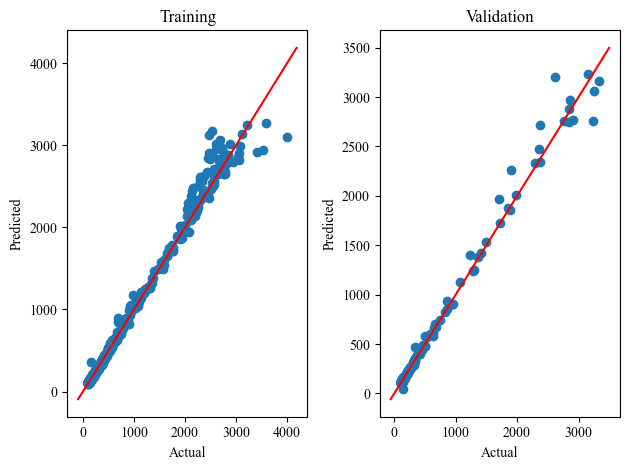

In [18]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [19]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

8/8 [==============================] - 0s 2ms/step


Text(0, 0.5, 'Predicted data')

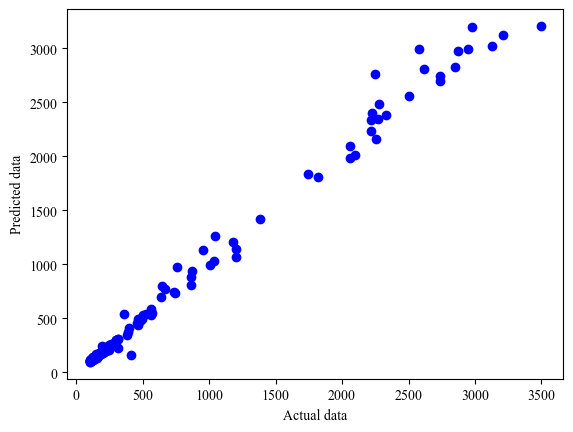

In [20]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
#plt.plot ([0,25000],[0,25000], color = "red")
#plt.axis ([0,25000,0,25000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

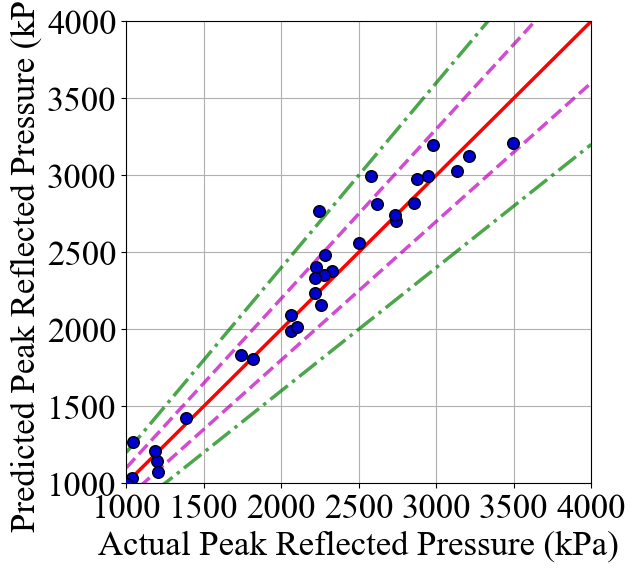

In [44]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (6, 6))

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


plt.ylabel('Predicted Peak Reflected Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Reflected Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)


x1 = np.linspace(1000,4000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(1000, 4000)
plt.xlim(1000, 4000)
#plt.legend(loc='upper left',fontsize = 25)

plt.grid()

# Set logarithmic scale
#plt.xscale('log')
#plt.yscale('log')

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')  #setting up above X-axis tick color to red
plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')
plt.show()

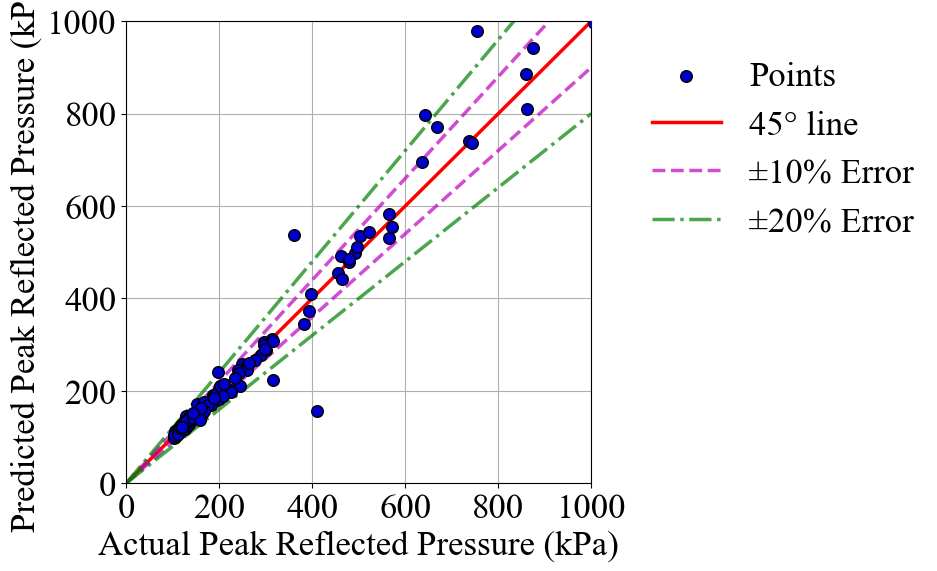

In [46]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (6, 6))

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


plt.ylabel('Predicted Peak Reflected Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Reflected Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)


x1 = np.linspace(0,1000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 1000)
plt.xlim(0, 1000)
plt.legend(loc=[1.1, 0.5],fontsize = 25, frameon=False)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')    
plt.savefig('plot2.png', dpi = 600, bbox_inches = 'tight')
plt.show()#setting up above X-axis tick color to red

In [35]:
# Convert arrays to DataFrames with column labels
X_test_df = pd.DataFrame(X_test, columns = ['Explosive mass', 'Perpendicular standoff distance', 'Incident angle', 'Comp B', 'TNT'])
y_test_df = pd.DataFrame(y_test, columns = ['test'])
y_pred_df = pd.DataFrame(y_pred, columns = ['pred'])

# Concatenate DataFrames along the vertical axis
pred_df = pd.concat([X_test_df, y_test_df, y_pred_df], axis=1)

# Save concatenated DataFrame to Excel file
pred_df.to_excel('pred_df.xlsx', index=False)

In [23]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

34/34 [==============================] - 0s 960us/step
21.541358037605356
26.781654966412166


In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9916133447205454


In [25]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.990412487217503


In [26]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 92.64%
Within 20% margin 96.54%
Out of 20% margin 3.46%


In [27]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9914269746032242


In [28]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

68.67424181673023

In [29]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

26.781654966412166

In [30]:
ann.save('Peak_Reflected_Pressure_ANN_2_nodrop_noscale.h5')

D:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load saved model

In [ ]:
ann = load_model('Peak_Reflected_Pressure_ANN_1_nodrop_noscale.h5')

## SHAP

In [47]:
dataset = pd.read_excel('RPDataset4.xlsx')
dataset = pd.get_dummies(dataset, columns=['Explosive type'])
y = dataset[('Peak reflected pressure')]
X = dataset.drop('Peak reflected pressure', axis=1)
print (X)

      Explosive mass  Perpendicular standoff distance  Incident angle  \
0                0.5                              2.0               0   
1                0.5                              2.0              15   
2                0.5                              2.0              30   
3                0.5                              2.0              45   
4                0.5                              2.0              60   
...              ...                              ...             ...   
1535            21.5                             20.0               0   
1536            21.5                             20.0              15   
1537            21.5                             20.0              30   
1538            21.5                             20.0              45   
1539            21.5                             20.0              60   

      Explosive type_Composition B  Explosive type_TNT  
0                                0                   1  
1        

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=71)
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size=0.5,
                                                random_state=71)

In [49]:
import shap
explainer = shap.KernelExplainer(ann.predict, X_train)
shap_values = explainer.shap_values(X_train)

34/34 [==============================] - 0s 1ms/step


Using 1078 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1078 [00:00<?, ?it/s]

1011/1011 [==============================] - 1s 1ms/step


In [ ]:
explainer2 = shap.Explainer(ann.predict, X_train)
shap_values2 = explainer2(X_train)

In [ ]:
import matplotlib as mpl
cmap = (mpl.colors.ListedColormap(['blue','orange', 'red'])
        .with_extremes(under='yellow', over='red'))

In [ ]:
print (X_train)

In [ ]:
features = ['Explosive mass', 'Perpendicular standoff distance', 'Incident angle', 'Explosive type-CompB', 'Explosive type-TNT' ]
shap.plots.beeswarm(shap_values2, color =cmap, order=shap_values2.abs.max(0), show = False)
fig = plt.gcf()

plt.rcParams.update(plt.rcParamsDefault)
#plt.figure(facecolor='white')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
#plt.rcParams['figure.facecolor'] = 'white'

fig.set_size_inches(7,6)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=25)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25, rotation=45)

# Get colorbar
cb_ax = fig.axes[1]


# Modifying color bar parameters
cb_ax.tick_params(labelsize=25)
cb_ax.set_ylabel("Feature value", fontsize=25)
plt.savefig('SHAP1.png', dpi = 600, bbox_inches = 'tight')
plt.show()
feature_names=features

In [ ]:
#Waterfall Plot (for an instance)
explainer3 = shap.Explainer(ann.predict, X_test)
#X_test.columns=features
shap_values3 = explainer3(X_test)

In [ ]:
shap.waterfall_plot(shap_values3[56], show=False)
#fig2, ax2 = plt.subplots()
plt.gcf()
plt.gcf().set_size_inches(7, 6)
plt.rc('font', size=40)
plt.rcParams['font.weight'] = 'normal'

#plt.xlabel('SHAP Value', fontsize = 25)

#ax2.set_xlabel('SHAP Value', fontsize = 25)
#ax2.xaxis.set_label_coords(0.5, 0.1)
plt.savefig('SHAP2.png', dpi = 600, bbox_inches = 'tight')
plt.show()

In [ ]:
#Partial Dependenace Plot
shap.dependence_plot(1, shap_values[0], X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
fig3 = plt.gcf()
plt.gcf().set_size_inches(7,6)
plt.ylabel("SHAP value for Standoff distance", fontsize = 25)
plt.xlabel("Standoff distance (m)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(ticks = [0, 5, 10, 15, 20],fontsize = 25)
plt.xlim (0, 21)
#plt.ylim (-1000, 6000)
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax3 = fig3.axes[1] 

# Modifying color bar parameters
cb_ax3.tick_params(labelsize=25)
cb_ax3.set_ylabel("Explosive mass (kg)", fontsize=25)
plt.savefig('SHAP3.png', dpi = 600, bbox_inches = 'tight')
plt.show()

In [ ]:
#Partial Dependenace Plot
shap.dependence_plot(0, shap_values[0], X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
fig4 = plt.gcf()
plt.gcf().set_size_inches(7,6)
plt.ylabel("SHAP value for Explosive mass", fontsize = 25)
plt.xlabel("Explosive mass (kg)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(ticks = [0, 5, 10, 15, 20, 25],fontsize = 25)
plt.xlim (0, 26)
#plt.ylim (-2500, 2000)
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax4 = fig4.axes[1] 

# Modifying color bar parameters
cb_ax4.tick_params(labelsize=25)
cb_ax4.set_ylabel("Standoff distance", fontsize=25)
plt.savefig('SHAP4.png', dpi = 600, bbox_inches = 'tight')
plt.show()

In [ ]:
#Partial Dependenace Plot
shap.dependence_plot(ind = 'Explosive mass',
                     shap_values = shap_values[0],
                     features = X_train,
                     feature_names = features,
                     interaction_index = 'Explosive type-TNT',
                     show=False, cmap=plt.get_cmap("winter"), dot_size = 30)
fig5 = plt.gcf()
plt.gcf().set_size_inches(7,6)
plt.ylabel("SHAP value for Explosive mass", fontsize = 25)
plt.xlabel("Explosive mass (kg)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(ticks = [0, 5, 10, 15, 20, 25],fontsize = 25)
plt.xlim (0, 26)
#plt.ylim (-2500, 2000)
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax5 = fig5.axes[1] 

# Modifying color bar parameters
cb_ax5.tick_params(labelsize=25)
#cb_ax5.set_ylabel("Standoff distance", fontsize=25)
plt.savefig('SHAP5.png', dpi = 600, bbox_inches = 'tight')
plt.show()